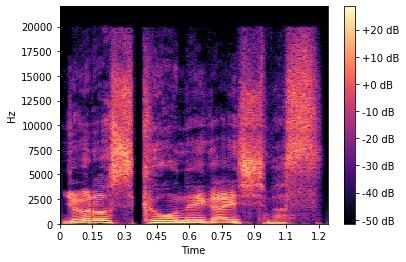

In [ ]:
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display


#音声ファイル読み込み
wav_filename = "/content/drive/MyDrive/Vo/output.wav"
rate, data = scipy.io.wavfile.read(wav_filename)

#16bitの音声ファイルのデータを-1から1に正規化
data = data / 32768
# フレーム長
fft_size = 1024
# フレームシフト長
hop_length = int(fft_size / 4)


# 短時間フーリエ変換実行
amplitude = np.abs(librosa.core.stft(data, n_fft=fft_size, hop_length=hop_length))

# 振幅をデシベル単位に変換
log_power = librosa.core.amplitude_to_db(amplitude)

# グラフ表示
librosa.display.specshow(log_power, sr=rate, hop_length=hop_length, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


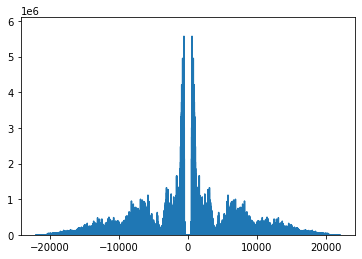

[20.14591919+29.90577541j 54.11362701+64.6006943j
 56.75502628-76.75362879j ... 56.75502628-76.75362879j
 54.11362701+64.6006943j  20.14591919+29.90577541j]


In [ ]:
#音声ファイル読み込み
wav_filename = "/content/drive/MyDrive/Vo/output.wav"
rate, data = scipy.io.wavfile.read(wav_filename)

##### 周波数成分を表示する #####
#FFT
fft_data = np.fft.fft(data)
shift = 500 #何Hz上げるか


data_len_half = int(len(fft_data)/2)
tmp1 = fft_data[data_len_half-1:len(fft_data)-1]
tmp1 = np.roll(tmp1, -shift)

for i in range(shift):
  j = shift - i #forを逆順でまわす
  tmp1[j] = tmp1[j*2] / 4
tmp2 = tmp1[::-1]
rolled_fft_data = np.concatenate((tmp2, tmp1))

#逆FFT
output = np.fft.ifft(rolled_fft_data).real
#データ整形
output = np.round(output).astype(int)
#wavで出力
scipy.io.wavfile.write("output_shift.wav", rate, output.astype(np.int16))

#横軸：周波数の取得　　#np.fft.fftfreq(データ点数, サンプリング周期)
freqList = np.fft.fftfreq(data.shape[0], d=1.0/rate)
#データプロット
plt.plot(freqList, rolled_fft_data)
plt.xlim() #0～5000Hzまで表示
plt.ylim(0,)
plt.show()

print(rolled_fft_data)